<h1>Reddit Scraped Comments</h1>

<h3>Installation and import of libraries</h3>

In [2]:
folder_path = "../Reddit_Scraped_Comments/"
output_folder_path = "./"
file1 = "anti_lockdown_comments.csv"
file2 = "corona_lockdown_comments.csv"
file3 = "covid19_lockdown_comments.csv"

In [3]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 23.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [4]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

import nltk
nltk.download('stopwords') #download if don't have yet
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<h3>Viewing Data</h3>

In [5]:
# Path
# folder_path = "../../covid-19-anti-lockdown-protests/Reddit_Scraped_Comments/"
# file1 = "anti_lockdown_comments.csv"
# file2 = "corona_lockdown_comments.csv"
# file3 = "covid19_lockdown_comments.csv"

In [6]:
anti_lockdown_comments_df = pd.read_csv(folder_path + file1)
anti_lockdown_comments_df

,Unnamed: 0,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl
0,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,schu4KSU,People like this everywhere in the world. Dif...,1
1,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,StupidizeMe,"Well, there's certainly enough of them to caus...",0
2,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Eltharion-the-Grim,They are largely absent from Asia. The only pl...,0
3,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,Thisam,"Yup, the percentage of population who are easi...",0
4,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1.598735e+09,2020-08-30 05:05:25,NaN,Short answer: Yes. Look at the USA and how Bre...,0
...,...,...,...,...,...,...,...,...,...,...,...
705,0,g4kdfs,vostok-Abdullah,Counter-Protesters in Scrubs Block Some Anti-L...,1483,192,1.587349e+09,2020-04-20 10:16:05,NaN,[removed],1
706,0,g4kdfs,vostok-Abdullah,Counter-Protesters in Scrubs Block Some Anti-L...,1483,192,1.587349e+09,2020-04-20 10:16:05,AutoModerator,Your comment has been removed because\n\n* **I...,0
707,0,g4kdfs,vostok-Abdullah,Counter-Protesters in Scrubs Block Some Anti-L...,1483,192,1.587349e+09,2020-04-20 10:16:05,Ameriican,They broke quarintine to tell others to not br...,1
708,0,g4kdfs,vostok-Abdullah,Counter-Protesters in Scrubs Block Some Anti-L...,1483,192,1.587349e+09,2020-04-20 10:16:05,AshingiiAshuaa,If the protesters' goal is to clog up streets ...,1


In [7]:
corona_lockdown_comments_df = pd.read_csv(folder_path + file2)
corona_lockdown_comments_df

,Unnamed: 0,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl
0,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Skooter_McGaven,I wish we had an understanding of where the ma...,1
1,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Richandler,> Is it overly family spread?\n\nI believe the...,0
2,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,NaN,This sounds horrible and I hate myself a littl...,0
3,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,lcbk,My husband and I are not yet confirmed to have...,0
4,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,ZombiGrn,In my neighborhood people started throwing par...,0
...,...,...,...,...,...,...,...,...,...,...,...
455,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,stillobsessed,A surprise lockdown period of 30 days wouldn't...,0
456,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,thisrockismyboone,Society would cease to function without infras...,0
457,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,SamH123,\- this depends a bit on what stage of spread ...,0
458,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,reini_urban,Strict physical distance may be statistically ...,1


<h3>Cleaning Data</h3>

In [8]:
# Drop columns with removed comments
anti_lockdown_comments_df = anti_lockdown_comments_df[anti_lockdown_comments_df.comment != "[removed]"]
corona_lockdown_comments_df = corona_lockdown_comments_df[corona_lockdown_comments_df.comment != "[removed]"]

In [9]:
list1 = anti_lockdown_comments_df["comment"].tolist()
list2 = corona_lockdown_comments_df["comment"].tolist()
comments = list1 + list2
print(len(comments))
print(comments[0])
print(comments[1])

1095
People like this everywhere in the world.  Difference is, are there enough to gain political power?
Well, there's certainly enough of them to cause a massive surge in COVID-19 cases and deaths, and to take some of us with them.


In [10]:
def remove_special_chars(text):
    remove_chars = '[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    return re.sub(remove_chars, ' ', text)

def remove_digit_strings(text):
    return re.sub(r'\d+', '', text)

def remove_links(text):
    return re.sub(r'http\S+', '', text)

def clean_text(text):
    result_text = remove_links(text)
    result_text = remove_digit_strings(result_text)
    result_text = remove_special_chars(result_text)
    result_text = result_text.lower()
    return result_text

In [11]:
for i in range(len(comments)):
    comments[i] = clean_text(comments[i])

In [12]:
print(comments[0])
print(comments[1])

people like this everywhere in the world   difference is  are there enough to gain political power 
well  there s certainly enough of them to cause a massive surge in covid  cases and deaths  and to take some of us with them 


<h3>Tokenizing Data</h3>

In [13]:
# Stopwords
stop_words = stopwords.words('english')
exclude_words = stop_words

#exclude common words 
exclude_words_extra = ["covid","lockdown", "pandemic","get","go","let","im","ive","would","one","also","to","say","day","well","month","thing"]

exclude_words.extend(exclude_words_extra)

In [14]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(comments))

In [15]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['people', 'like', 'this', 'everywhere', 'in', 'the', 'world', 'difference', 'is', 'are', 'there', 'enough', 'to', 'gain', 'political', 'power']


In [16]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in exclude_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['people', 'everywhere', 'world', 'difference', 'enough', 'gain', 'political', 'power']]


In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


[[('difference', 1),
  ('enough', 1),
  ('everywhere', 1),
  ('gain', 1),
  ('people', 1),
  ('political', 1),
  ('power', 1),
  ('world', 1)]]

<h3>LDA Model</h3>

In [19]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

# supporting function 2
def compute_perplexity_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    perplexity_score = lda_model.log_perplexity(corpus_sets[i])
    
    return perplexity_score

In [21]:
# Build LDA model
num_topics = 4
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [22]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"case" + 0.015*"death" + 0.011*"even" + 0.011*"test" + 0.011*"people" '
  '+ 0.010*"spread" + 0.010*"time" + 0.009*"measure" + 0.009*"take" + '
  '0.009*"infection"'),
 (1,
  '0.012*"comment" + 0.012*"think" + 0.012*"country" + 0.012*"believe" + '
  '0.010*"disease" + 0.010*"post" + 0.010*"many" + 0.010*"allow" + '
  '0.010*"testing" + 0.009*"happen"'),
 (2,
  '0.028*"people" + 0.022*"work" + 0.016*"get" + 0.016*"country" + '
  '0.015*"hospital" + 0.012*"place" + 0.011*"app" + 0.010*"mean" + '
  '0.009*"back" + 0.009*"think"'),
 (3,
  '0.022*"people" + 0.014*"go" + 0.011*"still" + 0.011*"home" + 0.010*"use" + '
  '0.010*"make" + 0.009*"infect" + 0.009*"much" + 0.009*"way" + 0.009*"week"')]


In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.7757046590724315

Coherence Score:  0.4201834707148897


In [25]:
optimal_model = lda_model
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.016*"case" + 0.015*"death" + 0.011*"even" + 0.011*"test" + 0.011*"people" '
  '+ 0.010*"spread" + 0.010*"time" + 0.009*"measure" + 0.009*"take" + '
  '0.009*"infection"'),
 (1,
  '0.012*"comment" + 0.012*"think" + 0.012*"country" + 0.012*"believe" + '
  '0.010*"disease" + 0.010*"post" + 0.010*"many" + 0.010*"allow" + '
  '0.010*"testing" + 0.009*"happen"'),
 (2,
  '0.028*"people" + 0.022*"work" + 0.016*"get" + 0.016*"country" + '
  '0.015*"hospital" + 0.012*"place" + 0.011*"app" + 0.010*"mean" + '
  '0.009*"back" + 0.009*"think"'),
 (3,
  '0.022*"people" + 0.014*"go" + 0.011*"still" + 0.011*"home" + 0.010*"use" + '
  '0.010*"make" + 0.009*"infect" + 0.009*"much" + 0.009*"way" + 0.009*"week"')]


In [26]:
def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms

In [27]:
topic_summaries = []
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(4):
    print('Topic '+str(i)+' |---------------------\n')
    tmp = explore_topic(lda_model,topic_number=i, topn=10, output=True )
#     print tmp[:5]
    topic_summaries += [tmp[:5]]
    print

term                 frequency

Topic 0 |---------------------

case                 0.016
death                0.015
even                 0.011
test                 0.011
people               0.011
spread               0.010
time                 0.010
measure              0.009
take                 0.009
infection            0.009
Topic 1 |---------------------

comment              0.012
think                0.012
country              0.012
believe              0.012
disease              0.010
post                 0.010
many                 0.010
allow                0.010
testing              0.010
happen               0.009
Topic 2 |---------------------

people               0.028
work                 0.022
get                  0.016
country              0.016
hospital             0.015
place                0.012
app                  0.011
mean                 0.010
back                 0.009
think                0.009
Topic 3 |---------------------

people               0.022
go 

###Dominant Topic

In [29]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

<ipython-input-29-f4478a66205d>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-29-f4478a66205d>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.5680,"people, work, get, country, hospital, place, a...","[people, everywhere, world, difference, enough..."
1,1,0,0.7329,"case, death, even, test, people, spread, time,...","[certainly, enough, cause, massive, surge, cas..."
2,2,1,0.5069,"comment, think, country, believe, disease, pos...","[largely, absent, read, small, group, largely,..."
3,3,2,0.4341,"people, work, get, country, hospital, place, a...","[percentage, population, easily, deceive, fall..."
4,4,0,0.4385,"case, death, even, test, people, spread, time,...","[short, answer, look, pass, long, answer, need..."
5,5,2,0.6324,"people, work, get, country, hospital, place, a...","[think, country, riddled, moron, nope, stupidi..."
6,6,0,0.5466,"case, death, even, test, people, spread, time,...","[enter, chat]"
7,7,0,0.3599,"case, death, even, test, people, spread, time,...",[see]
8,8,0,0.4426,"case, death, even, test, people, spread, time,...",[introduce]
9,9,2,0.6187,"people, work, get, country, hospital, place, a...","[safe, prediction, link, eventually, come, rus..."


###Most Representative Sentence for each Topic

In [30]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.8789,"case, death, even, test, people, spread, time, measure, take, infection","[live, global, center, infection, death, huge, number, unbelievably, ignorant, gullible, angry, ..."
1,1,0.9234,"comment, think, country, believe, disease, post, many, allow, testing, happen","[comment, remove, incivility, allow, sub, want, encourage_respectful, discussion, information, p..."
2,2,0.8848,"people, work, get, country, hospital, place, app, mean, back, think","[friend, conspiracy, theory, look, straight, eye, answer, question, incredibly, frustrating, edi..."
3,3,0.8761,"people, go, still, home, use, make, infect, much, way, week","[understand, mostly, medium, spin, majority, people, rally, simply, want, restriction, lift, gov..."


###Frequency Distribution of Word Counts in Documents

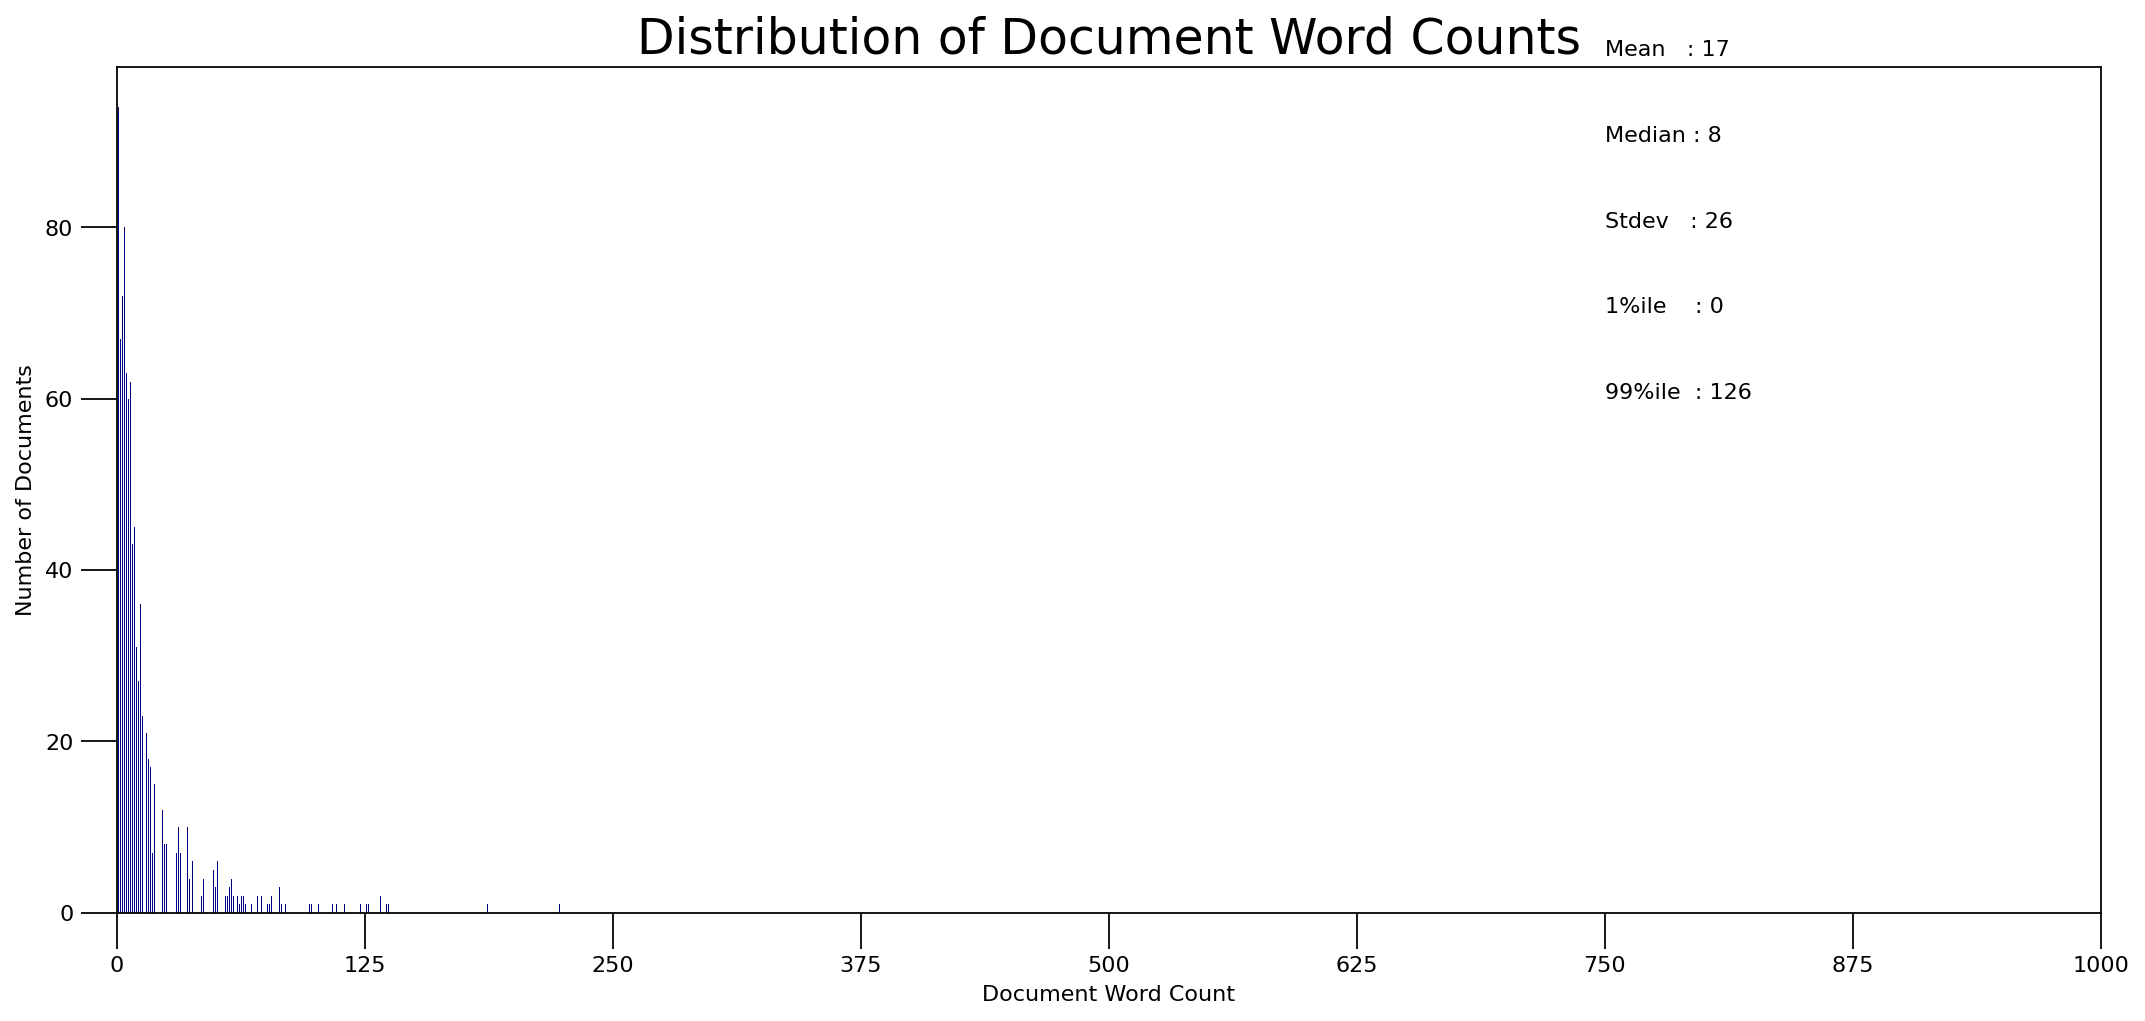

In [31]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

<ipython-input-32-cfc41bd4707a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-32-cfc41bd4707a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-32-cfc41bd4707a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-32-cfc41bd4707a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, col

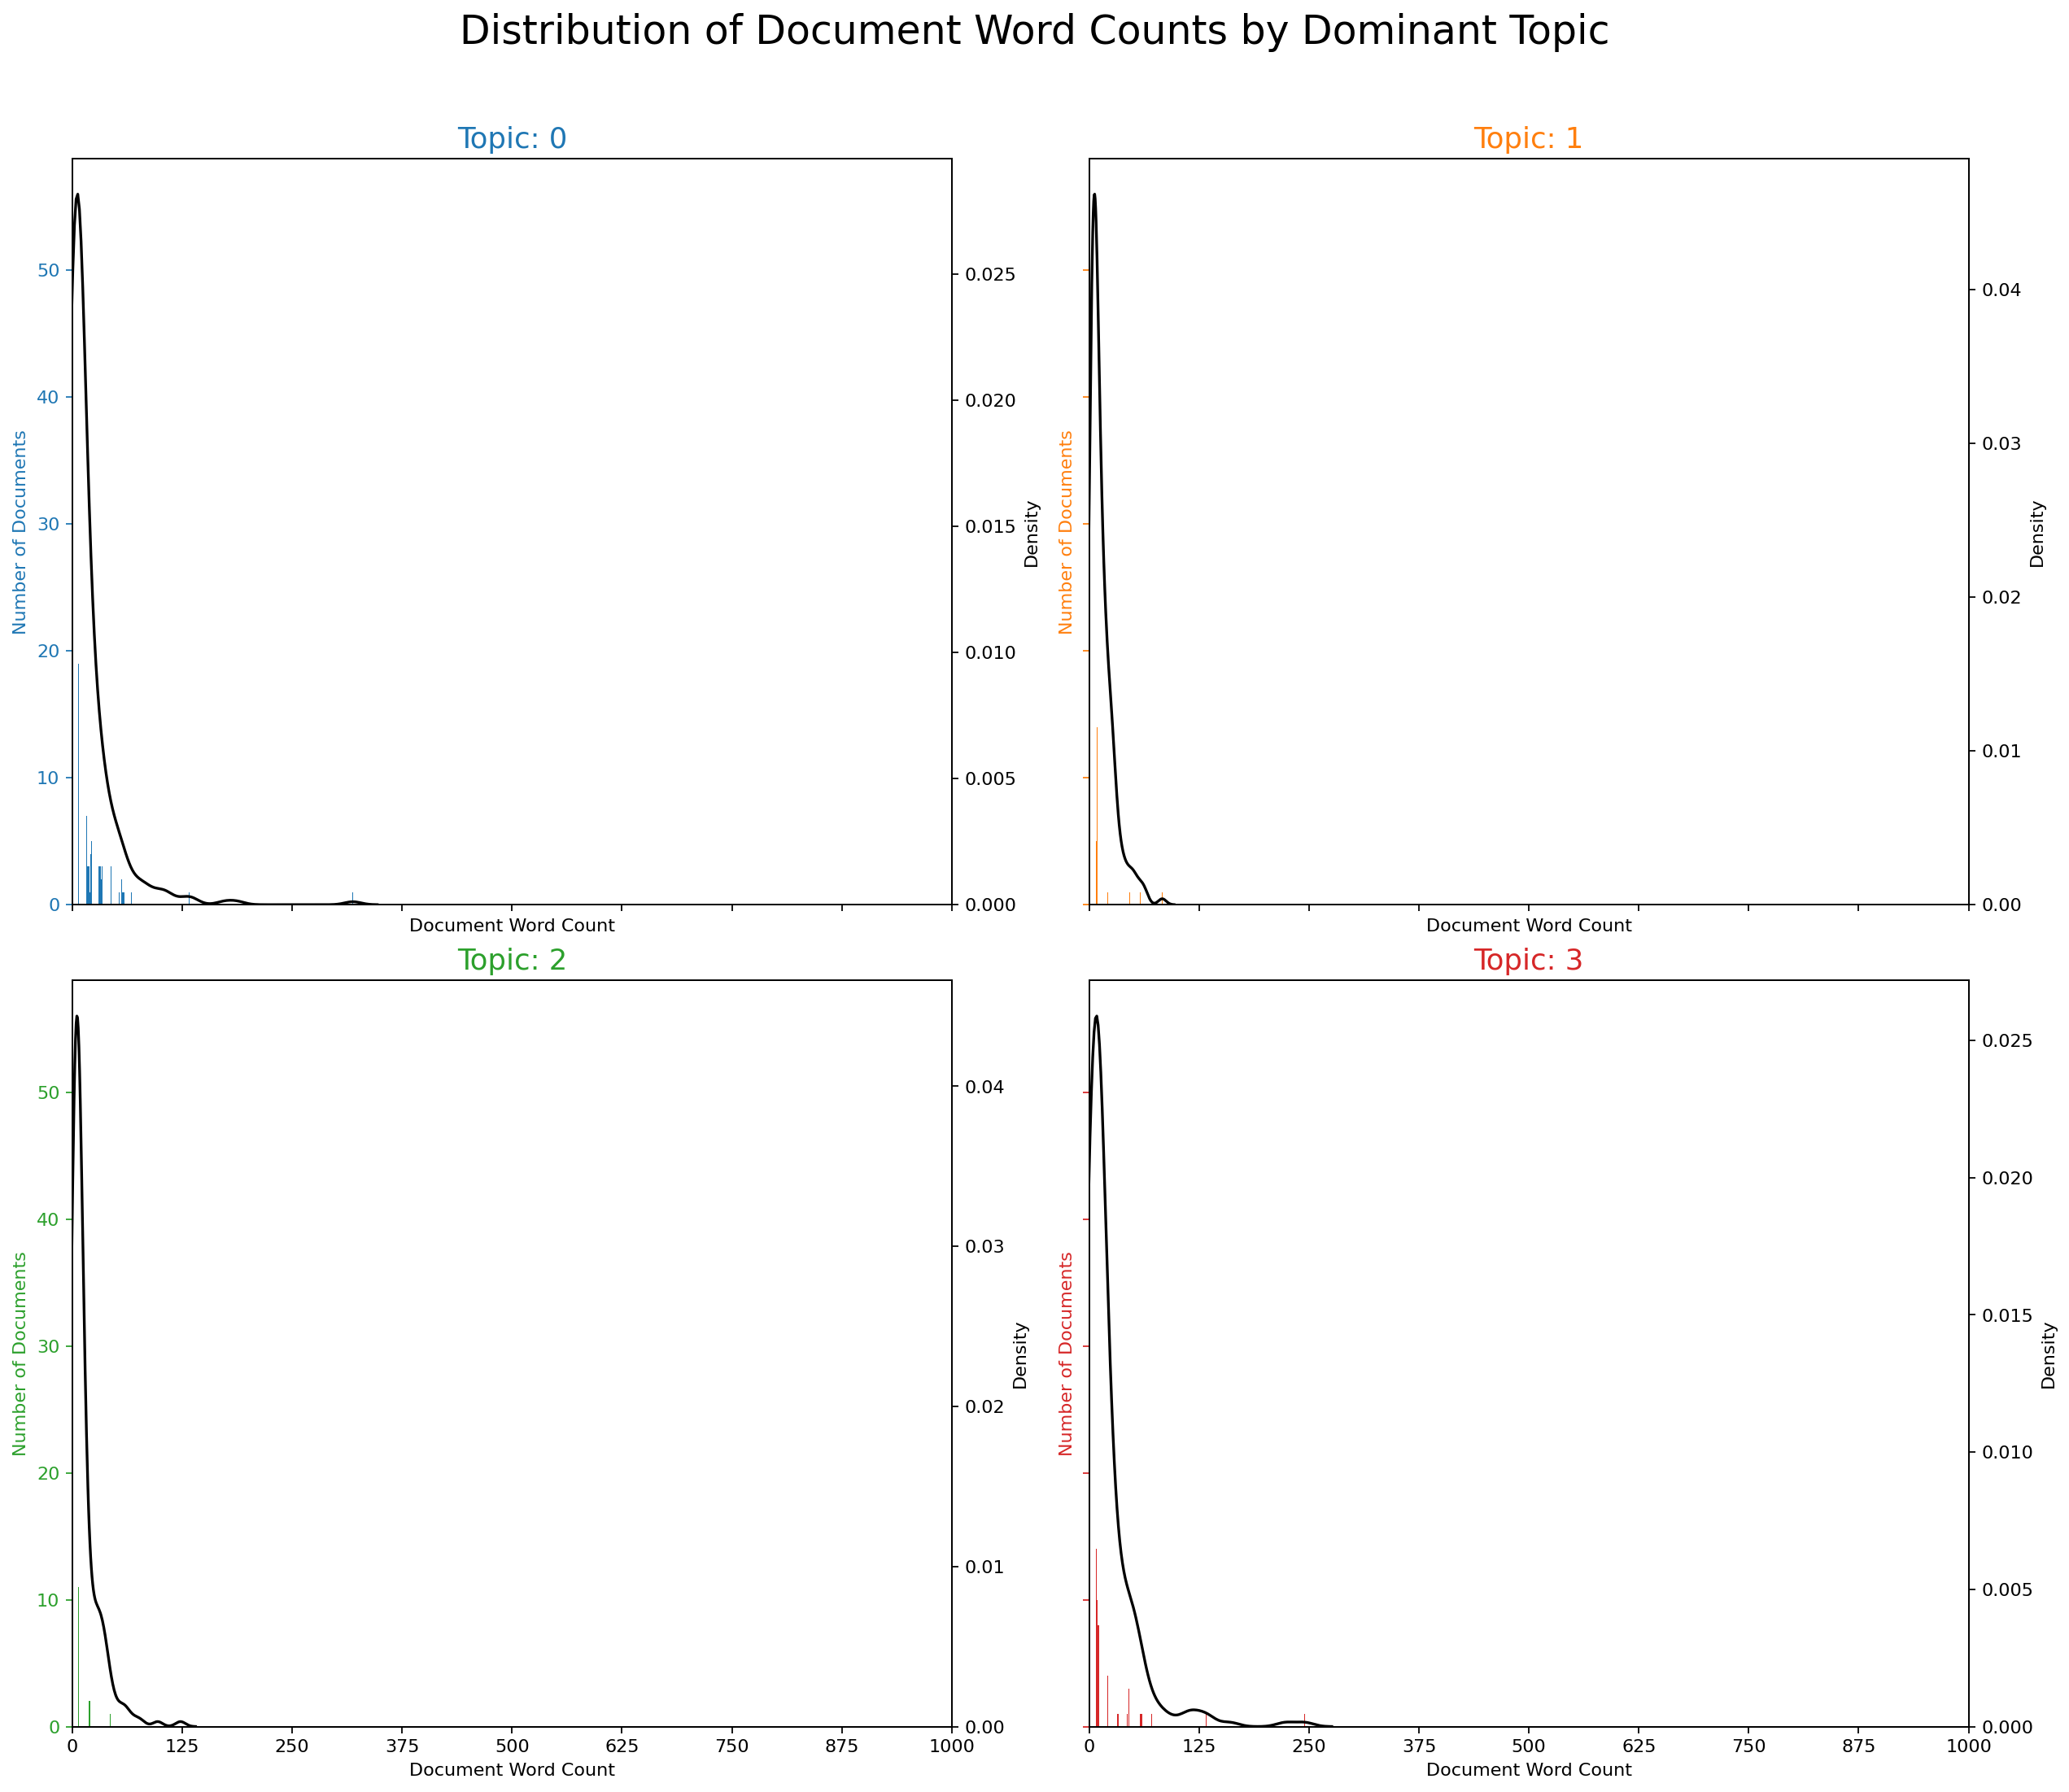

In [32]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

###Word Clouds of Top N Keywords in Each Topic

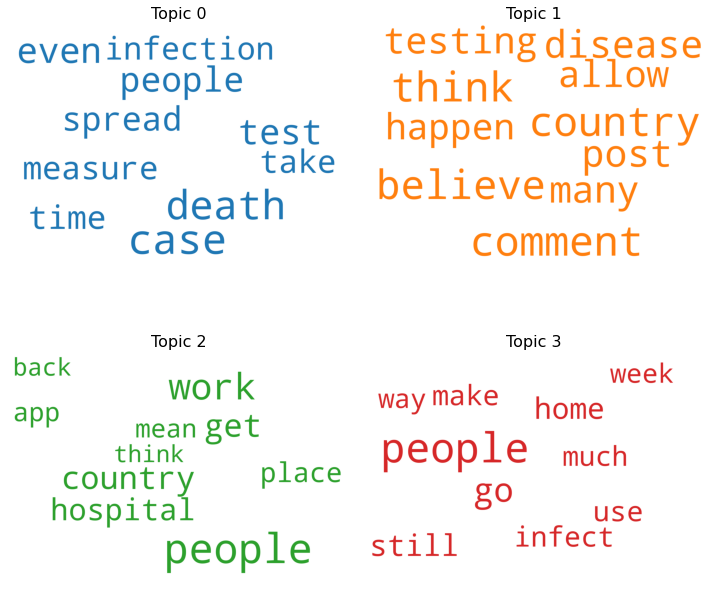

In [33]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

###Word Counts of Topic Keywords

<ipython-input-35-80bdc80795d4>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


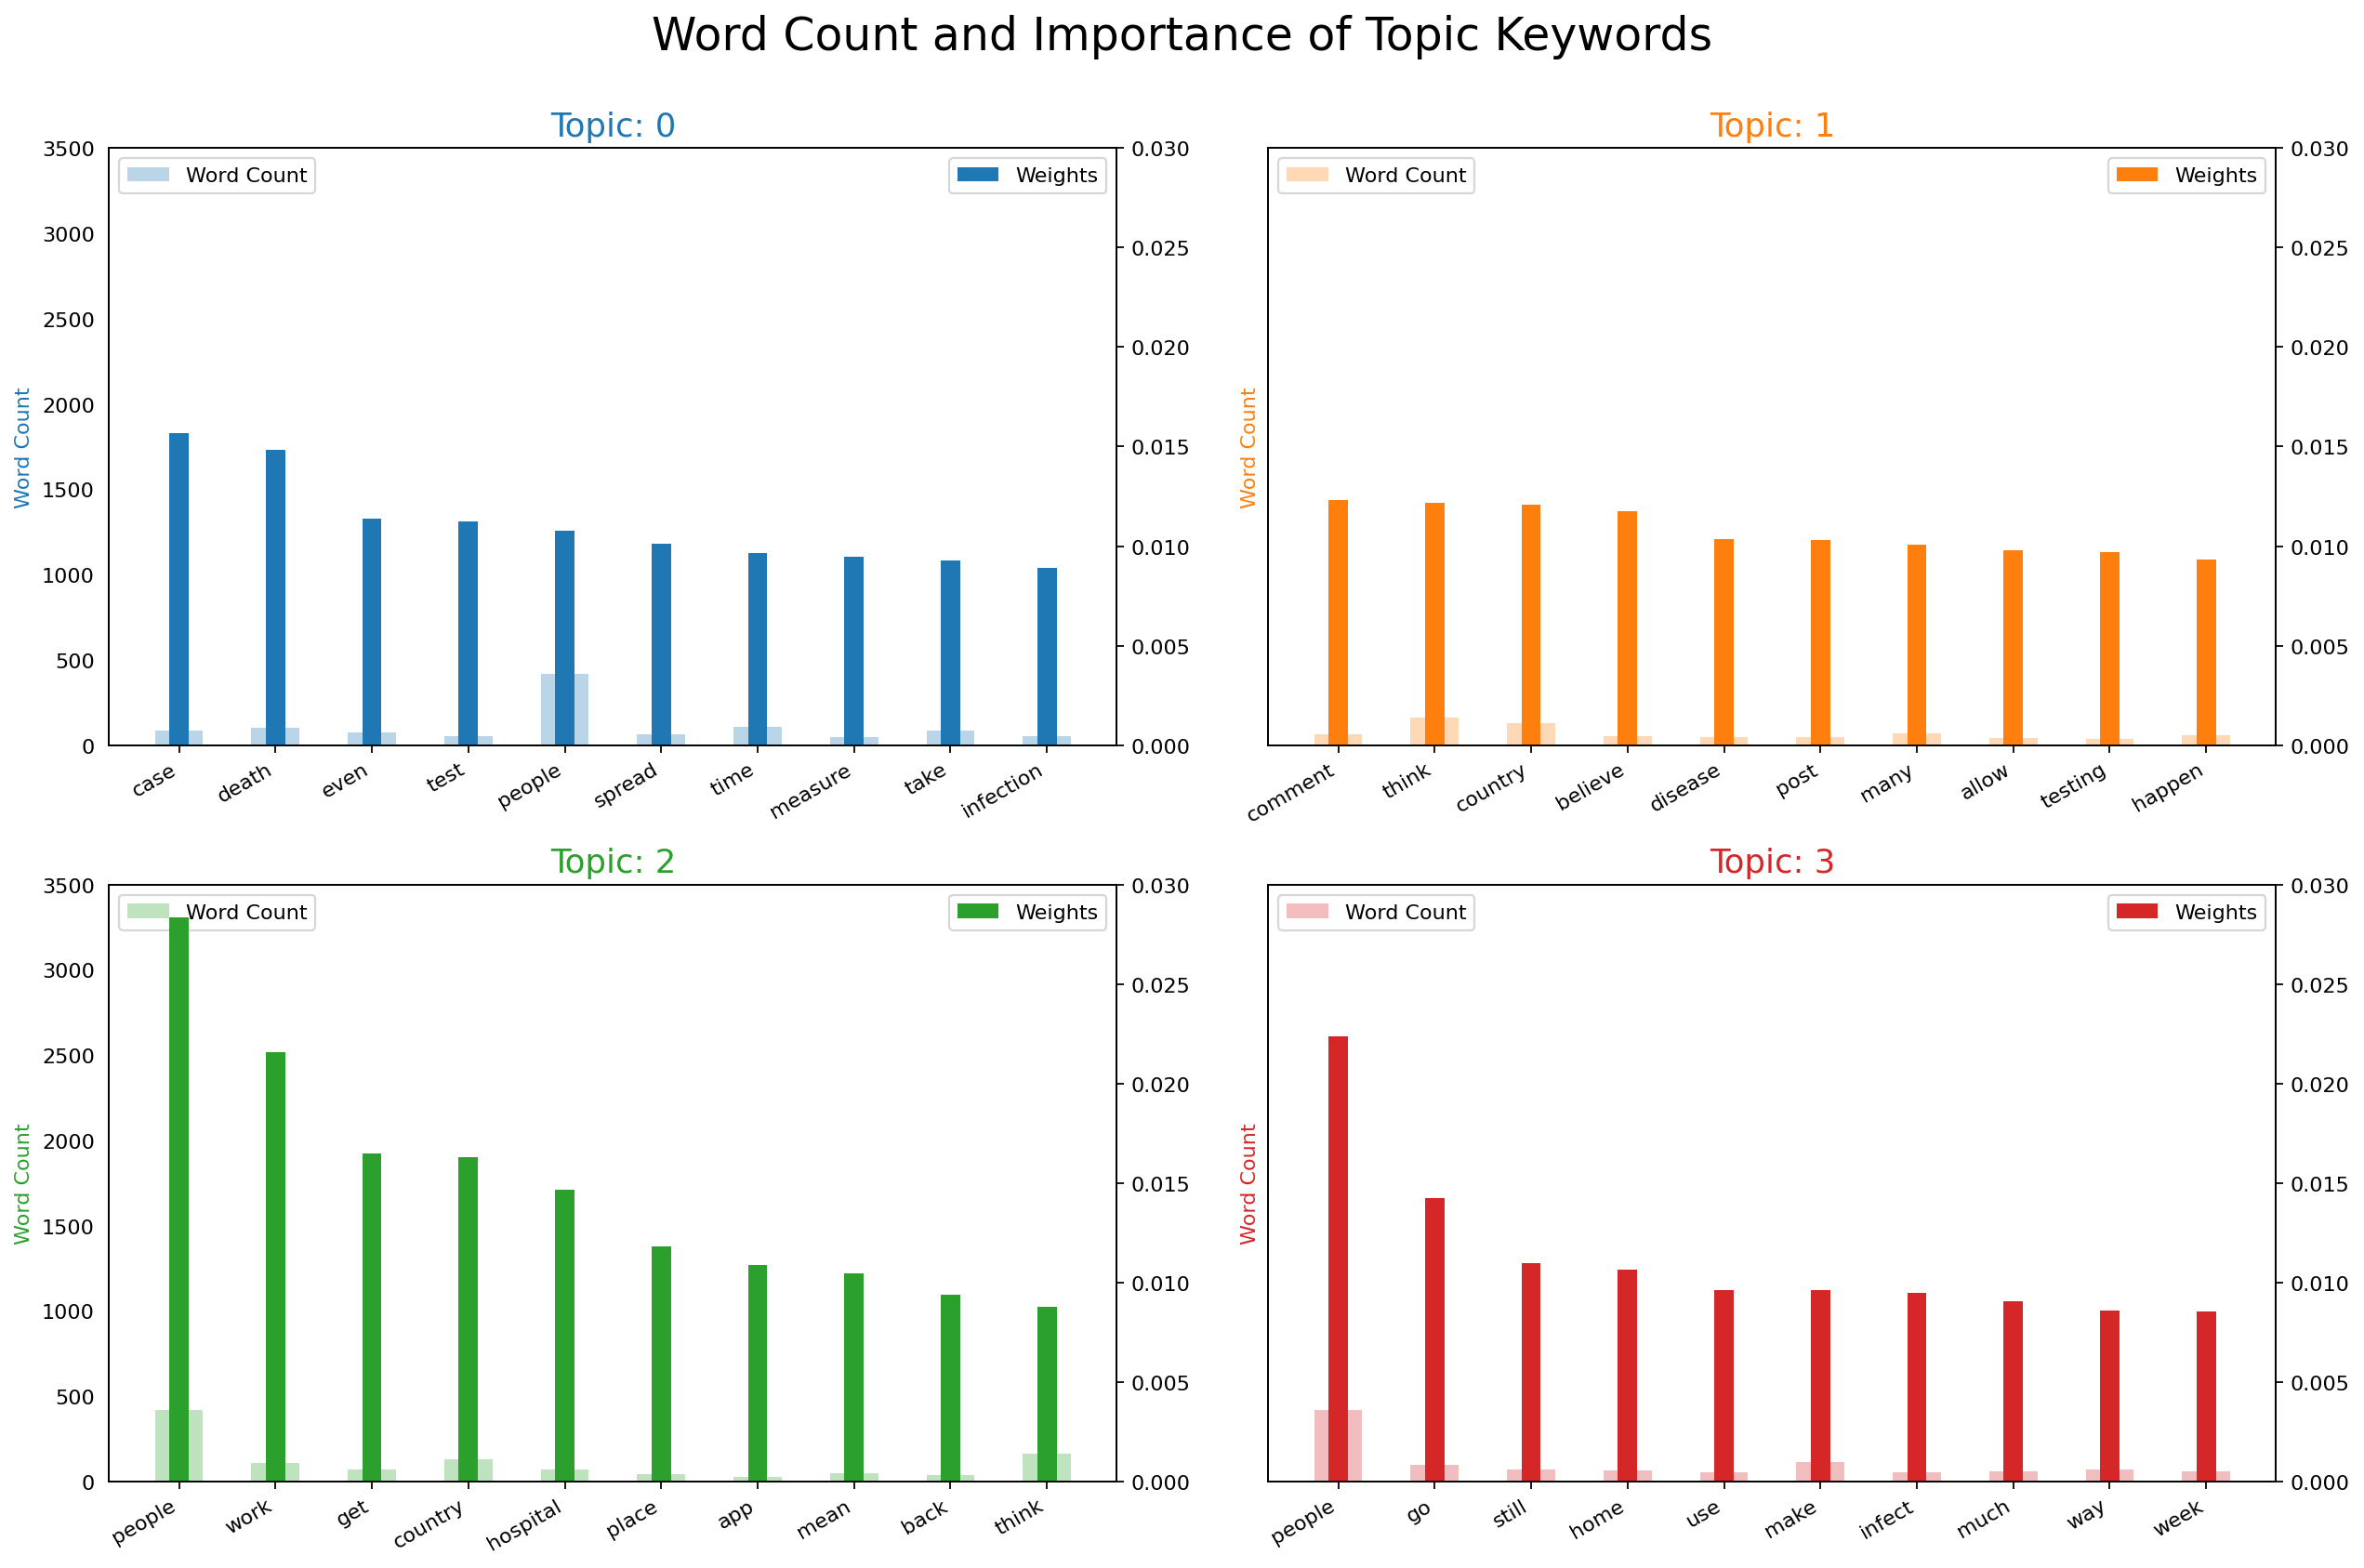

In [35]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

###Sentence Chart Colored by Topic

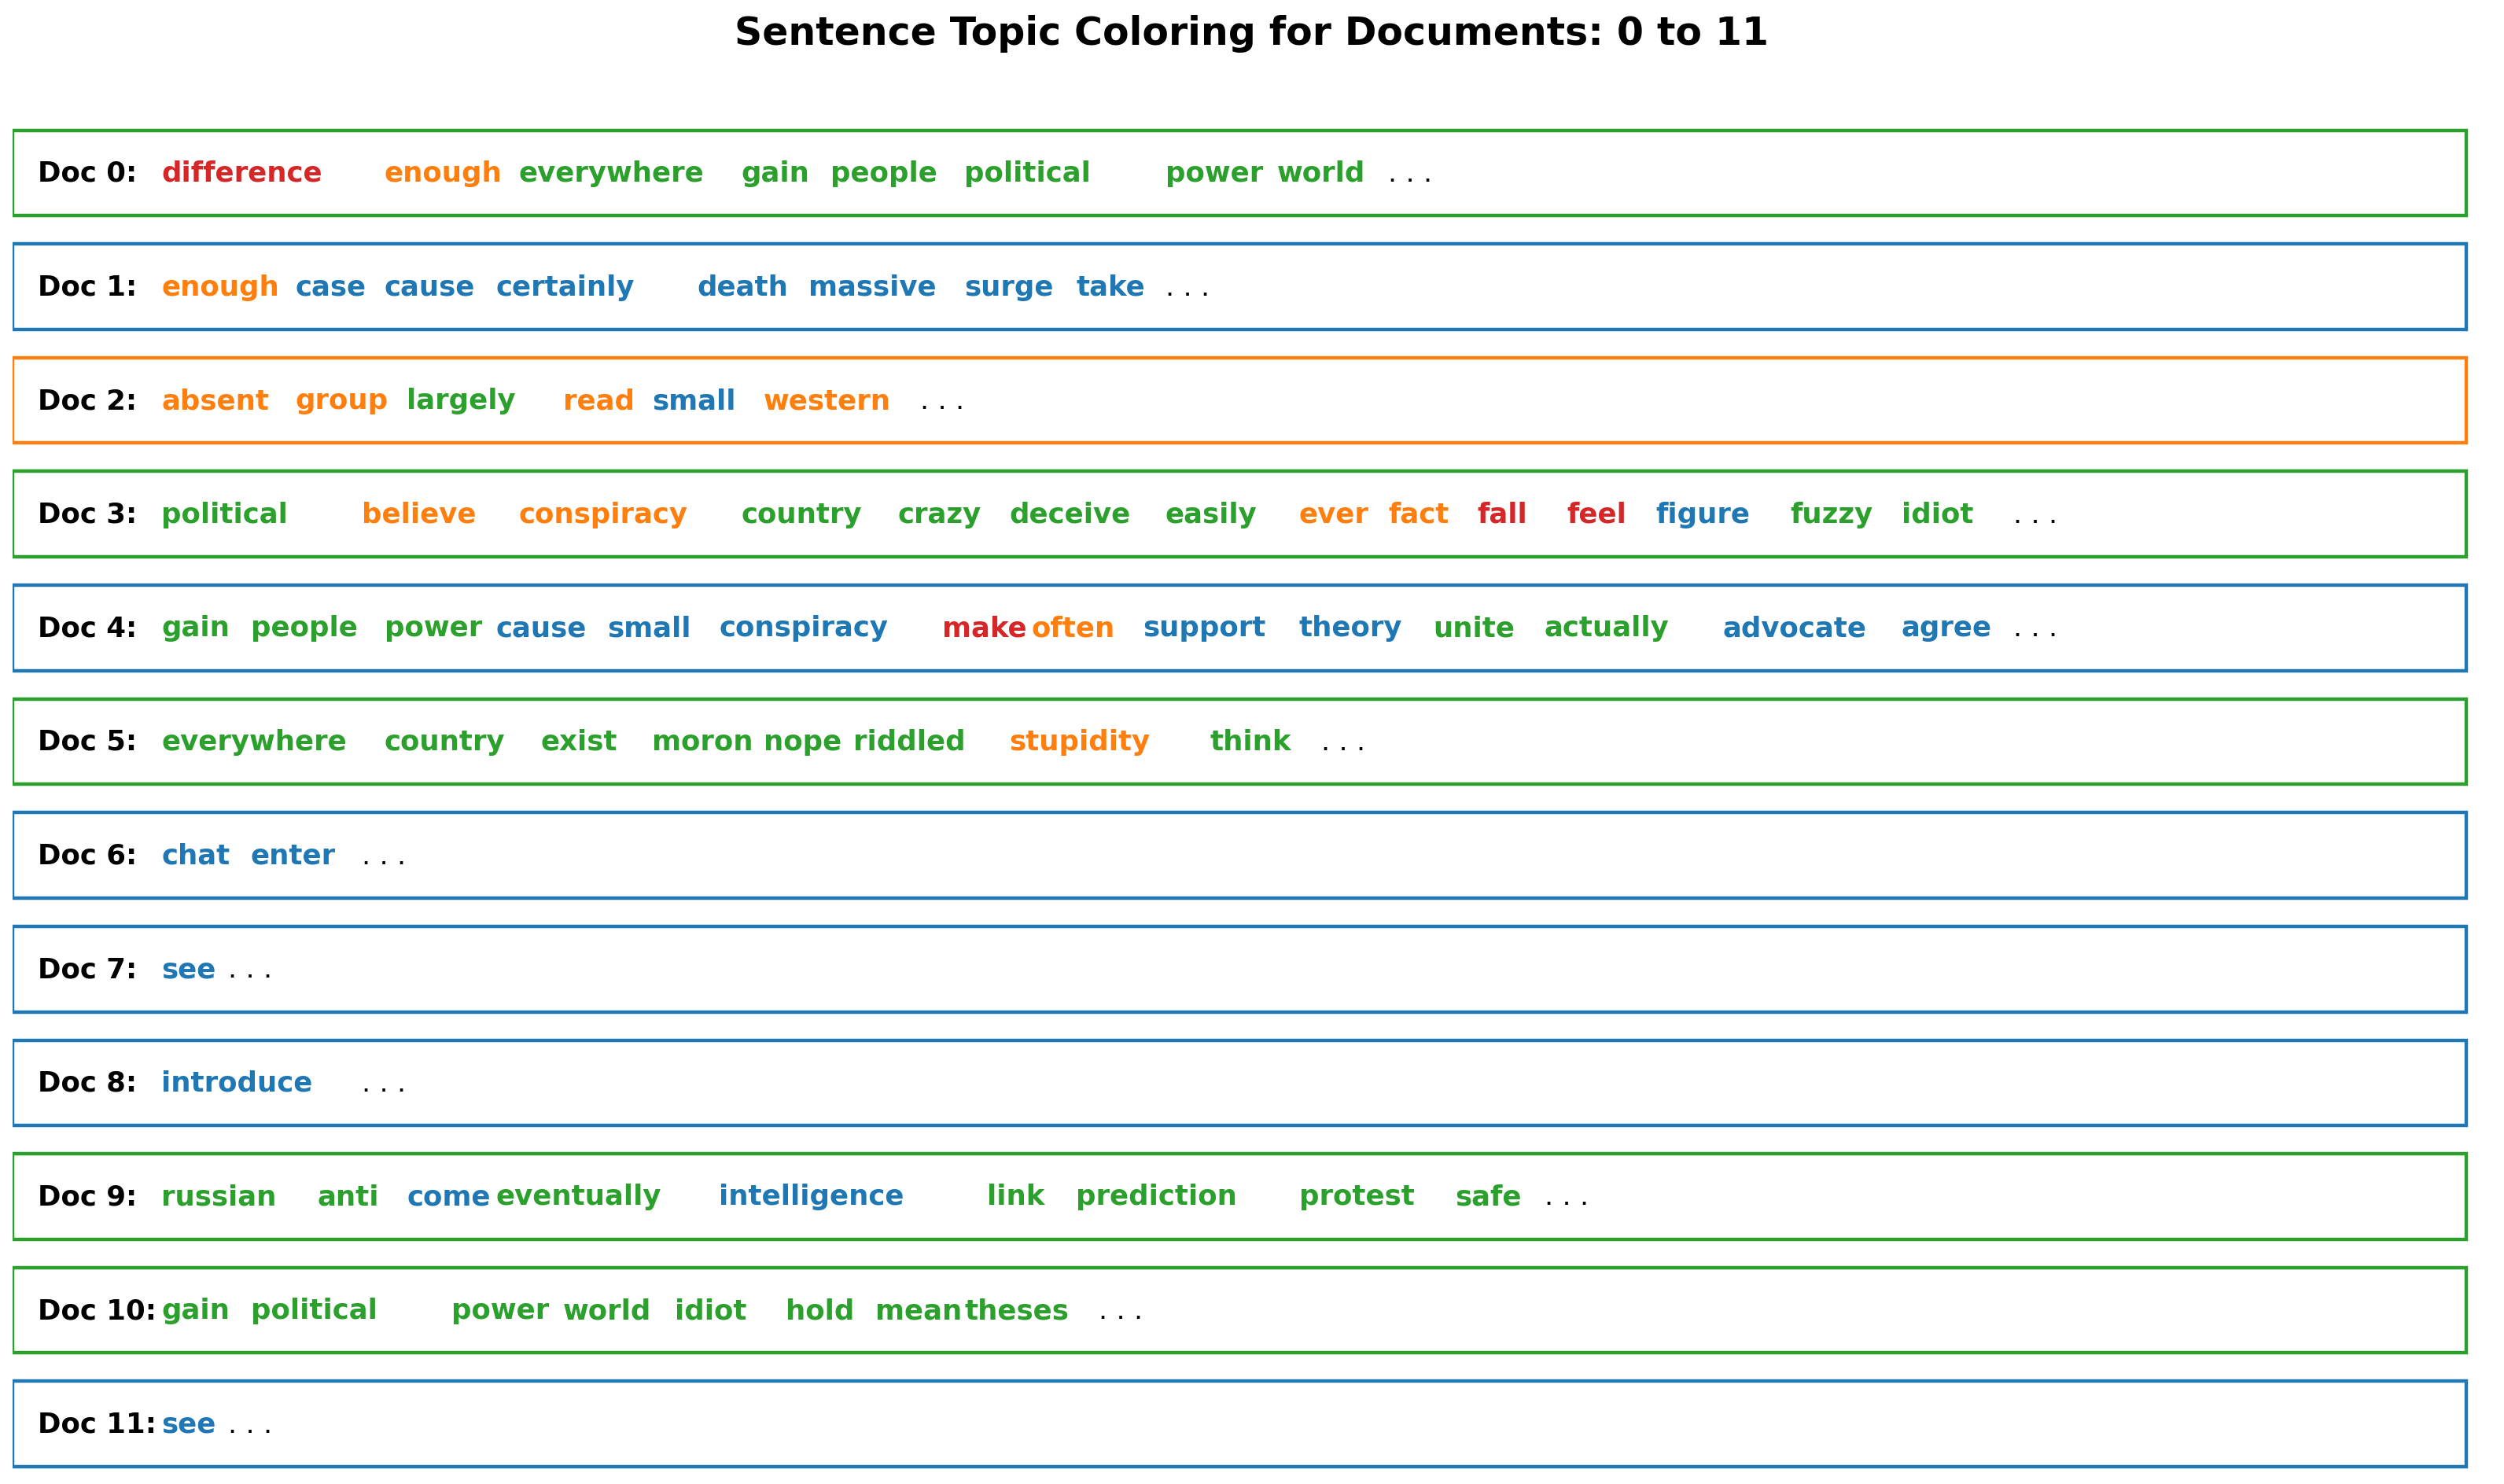

In [36]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

###What are the most discussed topics in the documents?

In [37]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

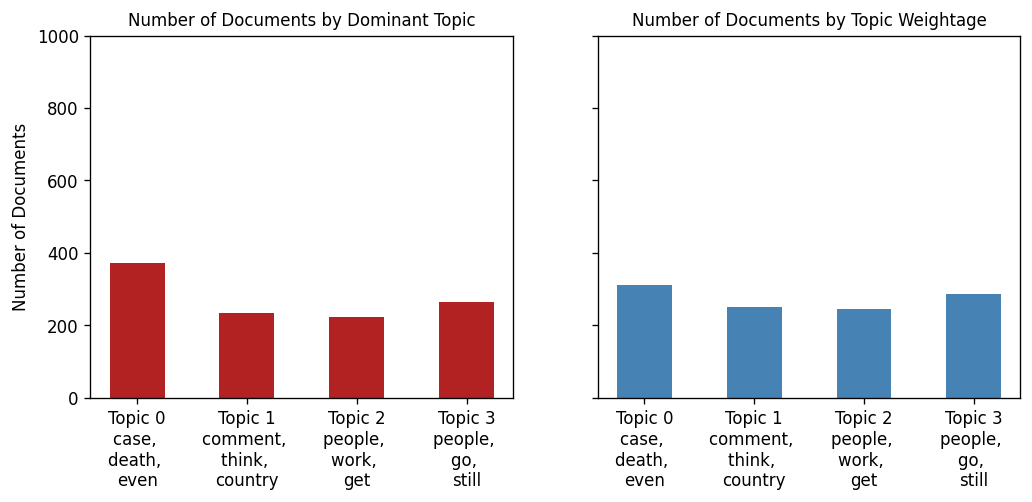

In [38]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

###t-SNE Clustering Chart

In [39]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1011 samples in 0.003s...
[t-SNE] Computed neighbors for 1011 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1011
[t-SNE] Computed conditional probabilities for sample 1011 / 1011
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.122524
[t-SNE] KL divergence after 1000 iterations: 0.495529


###pyLDAVis

In [40]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.225691 -0.117761       1        1  30.886380
3      0.043563  0.252810       2        1  28.358630
1     -0.202648 -0.048288       3        1  21.085177
2     -0.066607 -0.086761       4        1  19.669813, topic_info=        Term        Freq       Total Category  logprob  loglift
131     work   89.000000   89.000000  Default  30.0000  30.0000
8       case   90.000000   90.000000  Default  29.0000  29.0000
23   country  107.000000  107.000000  Default  28.0000  28.0000
11     death   85.000000   85.000000  Default  27.0000  27.0000
603      get   62.000000   62.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
138    think   32.131629  123.413133   Topic4  -4.7356   0.2804
194     know   26.376267   71.191466   Topic4  -4.9330   0.6332
118    right   24.474393   56.190101   Topic4  -5.0078   0.7950
141      see   23.568966   82.756462   Topic4  -5.0455   0.3701
46       use   21.571315   72.761050   Topic4  -5.1341   0.4103

[216 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3070      4  0.979596  adds_nothe
607       3  0.975202       allow
705       1  0.971766      amount
3197      2  0.046840         app
3197      4  0.936810         app
...     ...       ...         ...
896       2  0.986902        well
256       1  0.973542       whole
131       2  0.111539        work
131       4  0.881155        work
1047      1  0.947647       wrong

[251 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])